## Customer and Product Insights

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [4]:
df = pd.read_csv("../data/processed/cleaned_retail_sales.csv")
df["date"] = pd.to_datetime(df["date"])
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Customer Demographics Analysis

In [5]:
gender_counts = df["gender"].value_counts()
gender_counts


gender
Female    510
Male      490
Name: count, dtype: int64

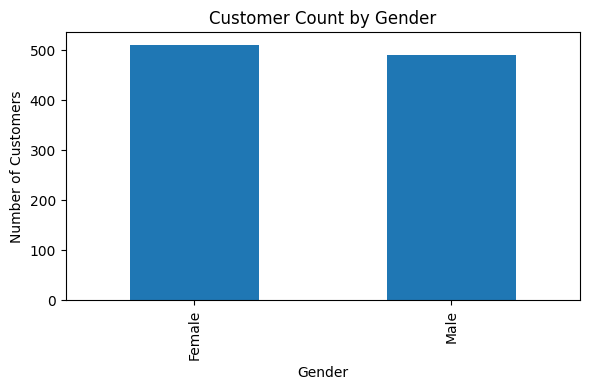

In [6]:
plt.figure(figsize=(6, 4))
gender_counts.plot(kind="bar")
plt.title("Customer Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.tight_layout()

plt.savefig("../outputs/figures/customer_count_by_gender.png")
plt.show()


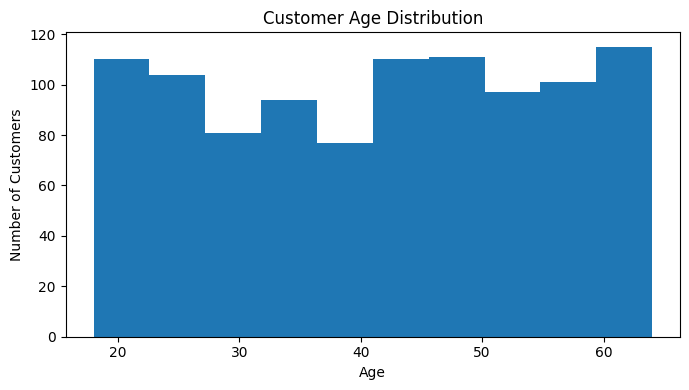

In [7]:
plt.figure(figsize=(7, 4))
plt.hist(df["age"], bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout()

plt.savefig("../outputs/figures/age_distribution.png")
plt.show()


In [8]:
category_sales = (
    df.groupby("product_category")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

category_sales


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

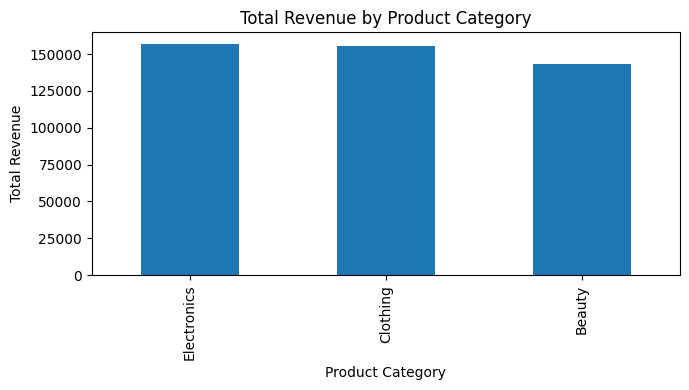

In [9]:
plt.figure(figsize=(7, 4))
category_sales.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("../outputs/figures/revenue_by_category.png")
plt.show()


In [10]:
monthly_sales = (
    df.set_index("date")
      .resample("M")["total_amount"]
      .sum()
)

monthly_sales


C:\Users\tathi\AppData\Local\Temp\ipykernel_33532\3068272697.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["total_amount"]


date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: total_amount, dtype: int64

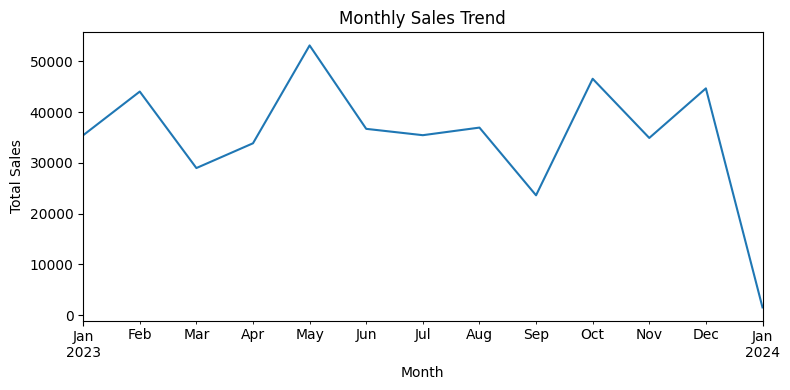

In [11]:
plt.figure(figsize=(8, 4))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("../outputs/figures/monthly_sales_trend.png")
plt.show()


In [12]:
average_order_value = df["total_amount"].mean()
average_order_value


np.float64(456.0)

In [13]:
gender_revenue = (
    df.groupby("gender")["total_amount"]
      .sum()
      .sort_values(ascending=False)
)

gender_revenue


gender
Female    232840
Male      223160
Name: total_amount, dtype: int64

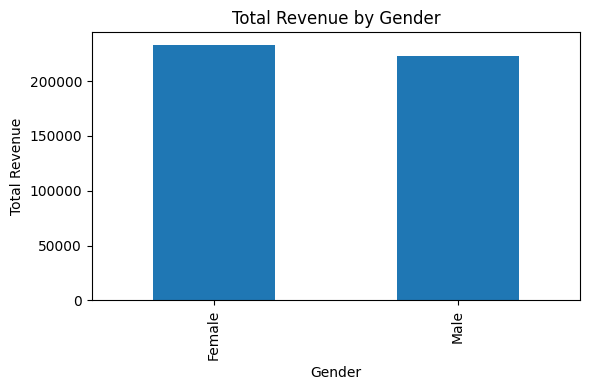

In [14]:
plt.figure(figsize=(6, 4))
gender_revenue.plot(kind="bar")
plt.title("Total Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("../outputs/figures/revenue_by_gender.png")
plt.show()


In [15]:
gender_avg_spend = (
    df.groupby("gender")["total_amount"]
      .mean()
      .sort_values(ascending=False)
)

gender_avg_spend


gender
Female    456.549020
Male      455.428571
Name: total_amount, dtype: float64

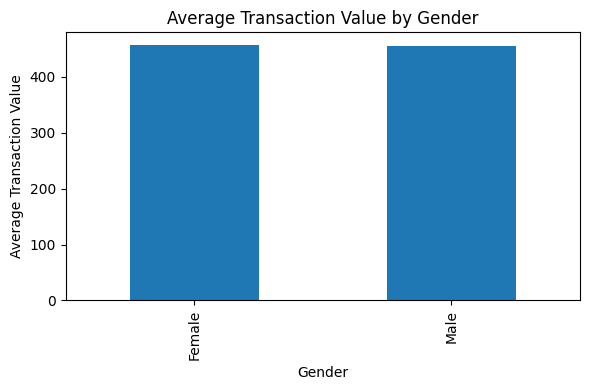

In [16]:
plt.figure(figsize=(6, 4))
gender_avg_spend.plot(kind="bar")
plt.title("Average Transaction Value by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Transaction Value")
plt.tight_layout()

plt.savefig("../outputs/figures/avg_transaction_value_by_gender.png")
plt.show()


In [17]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["<20", "20–29", "30–39", "40–49", "50–59", "60+"]

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels)


In [18]:
age_group_revenue = (
    df.groupby("age_group")["total_amount"]
      .sum()
      .sort_values(ascending=False)
)

age_group_revenue


C:\Users\tathi\AppData\Local\Temp\ipykernel_33532\1742432341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["total_amount"]


age_group
50–59    100085
20–29     98215
30–39     95950
40–49     93795
<20       34730
60+       33225
Name: total_amount, dtype: int64

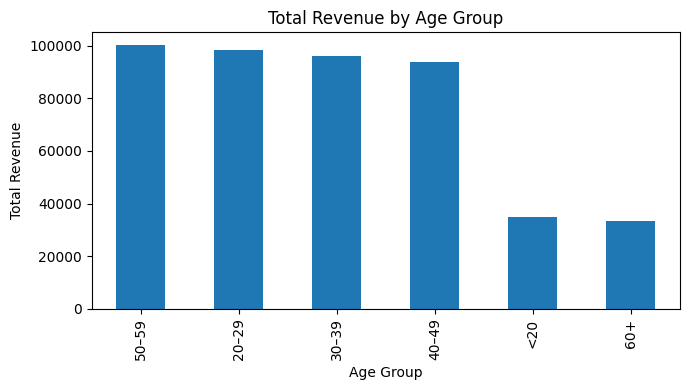

In [19]:
plt.figure(figsize=(7, 4))
age_group_revenue.plot(kind="bar")
plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("../outputs/figures/revenue_by_age_group.png")
plt.show()


In [20]:
top_customers = (
    df.groupby("customer_id")["total_amount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_customers


customer_id
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: total_amount, dtype: int64

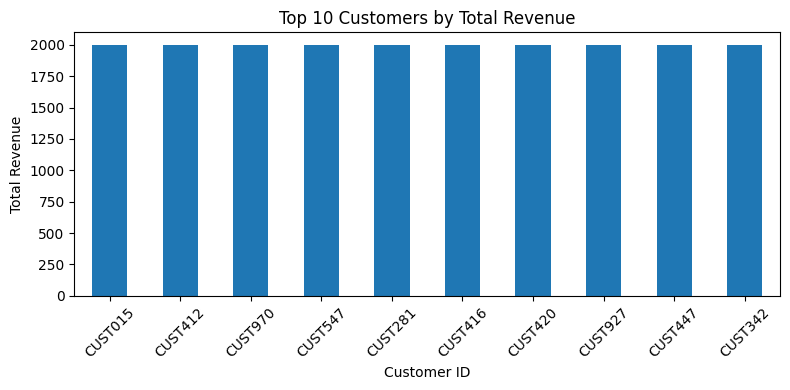

In [21]:
plt.figure(figsize=(8, 4))
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Total Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("../outputs/figures/top_10_customers.png")
plt.show()


In [22]:
category_revenue = (
    df.groupby("product_category")["total_amount"]
      .sum()
      .sort_values(ascending=False)
)

category_revenue


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

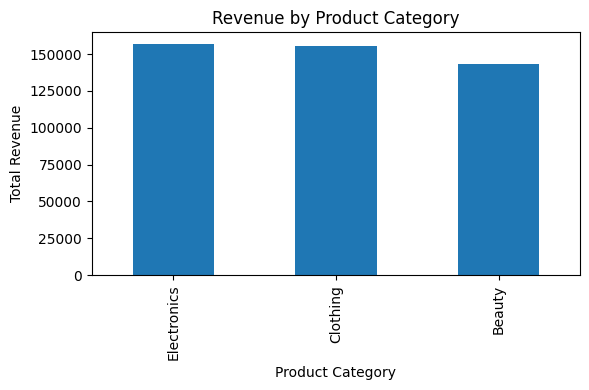

In [23]:
plt.figure(figsize=(6, 4))
category_revenue.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("../outputs/figures/revenue_by_product_category.png")
plt.show()


## Key Business Insights

- Revenue contribution differs across genders, but average transaction value highlights spending behavior per purchase.
- Customers in the 30–49 age range generate the highest revenue, indicating a strong target demographic.
- A small number of customers contribute disproportionately to total revenue.
- Certain product categories clearly outperform others and should be prioritized in inventory and marketing strategies.
